In [2]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
birthDF = pd.read_csv('data/births.csv', index_col='year')  # index_col : year 컬럼을 index 로 뺌.
birthDF

,boys,girls
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


1. 남아 ,여아 출생 평균을 구하시오.

In [100]:
birthDF.mean().round()

boys     1225776.0
girls    1245399.0
dtype: float64

2. 남아 수가 평균보다 많은 연도만 출력하시오.

In [114]:
birthDF[birthDF[' boys']>birthDF[' boys'].mean()].index

Index([1921, 1924, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
      dtype='int64', name='year')

3. 남아출생이 가장많은 top5를 구하시오. (년도와 남아수)

In [103]:
birthDF[' boys'].nlargest(5, keep='all')

year
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name:  boys, dtype: int64

4. 남아율(%) 을 구하고 각년도별 남아수가 차지하는비율컬럼을 추가하시오.

In [31]:
birthDF['남아율(%)'] = birthDF[' boys']/birthDF.sum(axis=1)*100

birthDF

,boys,girls,남아율(%)
year,,,
1880,90993,110491,45.151282
1881,91954,100745,47.707167
1882,107850,113688,48.671698
1883,112321,104629,51.760407
1884,129022,114445,52.982097
...,...,...,...
2007,1919408,2072139,48.086240
2008,1887234,2036289,48.099906
2009,1832925,1979303,48.079545


5. 2000년도 이후데이터 에 대해 출생량 을 구하고 남아수가 1800000 이상이면 '많음'아니면 '적음' 이라고 보여 주시오.
(결과는 데이터프레임)
```
년도 	남아수 출생량
----------------------
2000   1233   '많음'
2001   1234   '적음'
```

In [95]:
birth_b = birthDF.loc[2000:, ' boys']
birth_many = birthDF.loc[2000:].apply(lambda v: '많음' if v.loc[' boys']>1800000 else '적음', axis=1)

boy_dict = {'남아수':birth_b, '출생량':birth_many}
pd.DataFrame(boy_dict)

,남아수,출생량
year,,
2000,1814601,많음
2001,1799049,적음
2002,1795206,적음
2003,1825359,많음
2004,1834145,많음
2005,1845379,많음
2006,1898463,많음
2007,1919408,많음
2008,1887234,많음


6. 1800년대,1900년대,2000년대 각 남아수,여야수 평균을 구하시오.

In [102]:
avg_18c = birthDF.loc[1800:1899].mean()
avg_19c = birthDF.loc[1900:1999].mean()
avg_20c = birthDF.loc[2000:].mean()

In [93]:
# 풀이1. dict 타입으로 저장 후 DataFrame 으로 변환
avg_dict = {'1800년대':avg_18c, '1900년대':avg_19c, '2000년대':avg_20c}

c_avg = pd.DataFrame(avg_dict)
c_avg

,1800년대,1900년대,2000년대
boys,176714.15,1362901.51,1.831501e+06
girls,111820.55,1384145.55,1.978478e+06


In [ ]:
# 풀이2. concat으로 합치기
avg_18c.name = '1800년대'
avg_19c.name = '1900년대'
avg_20c.name = '2000년대'

c_avg = pd.concat([avg_18c, avg_19c, avg_20c], axis=1)
c_avg

,1800년대,1900년대,2000년대
boys,176714.15,1362901.51,1.831501e+06
girls,111820.55,1384145.55,1.978478e+06


7. 6번의 1800년대,1900년대,2000년대를 x축으로 그리고, 남아수, 여아수 평균을 y축으로 라인차트를 그리시오.

<Axes: >

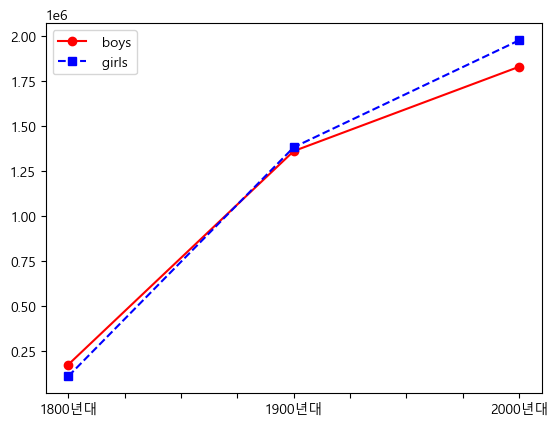

In [115]:
c_avg.T.plot(style=['r-o', 'b--s'])

8. 연도별로 누가 더 많이 태어났는지(남아 vs 여아) 비교하시오. 각 행에서 남아 > 여아 이면 'Boy', 아니면 'Girl'을 출력.  
출력결과( 결과는 데이터프레임)
```
년도 결과
----------------
1800 boy
1801 boy
....
2100 girl
```

In [65]:
b_g = birthDF.apply(lambda v: 'Boy' if v[' boys']>v[' girls'] else 'Girl', axis=1)

pd.DataFrame(b_g, columns=['결과'])

,결과
year,
1880,Girl
1881,Girl
1882,Girl
1883,Boy
1884,Boy
...,...
2007,Girl
2008,Girl
2009,Girl


9. 총 출생아 수 기준 가장 많은 해 년도를 구하시오.

In [80]:
birthDF[birthDF.sum(axis=1)==birthDF.sum(axis=1).max()].index

Index([1957], dtype='int64', name='year')

10. 여아 수가 남아 수보다 많은 연도만 추출하시오.

In [84]:
birthDF[birthDF[' boys']<birthDF[' girls']].index

Index([1880, 1881, 1882, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011],
      dtype='int64', name='year')

11. 남아 증가량(전년 대비 변화율)을 계산하시오.

In [86]:
birthDF[' boys'].diff()

year
1880        NaN
1881      961.0
1882    15896.0
1883     4471.0
1884    16701.0
         ...   
2007    20945.0
2008   -32174.0
2009   -54309.0
2010   -60187.0
2011   -19238.0
Name:  boys, Length: 132, dtype: float64

12. 2000대이후 남아 여아 바차트를 그리시오. ( df.plot(kind='bar') 이용)

<Axes: xlabel='year'>

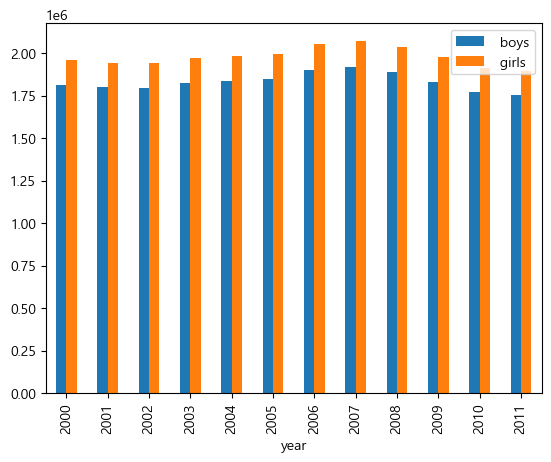

In [88]:
birthDF.loc[2000:].plot(kind='bar')